# <center>Back Orders Classification</center>

___

## Problem Statement

Identify products at risk of backorder before the event occurs so that business has time to react.

## What is a Backorder?
Backorders are products that are temporarily out of stock, but a customer is permitted to place an order against future inventory. A backorder generally indicates that customer demand for a product or service exceeds a company’s capacity to supply it. Back orders are both good and bad. Strong demand can drive back orders, but so can suboptimal planning.

## Data Description

Data file contains the historical data for the 8 weeks prior to the week we are trying to predict. The data was taken as weekly snapshots at the start of each week. Columns are defined as follows:

    sku - Random ID for the product

    national_inv - Current inventory level for the part

    lead_time - Transit time for product (if available)

    in_transit_qty - Amount of product in transit from source

    forecast_3_month - Forecast sales for the next 3 months

    forecast_6_month - Forecast sales for the next 6 months

    forecast_9_month - Forecast sales for the next 9 months

    sales_1_month - Sales quantity for the prior 1 month time period

    sales_3_month - Sales quantity for the prior 3 month time period

    sales_6_month - Sales quantity for the prior 6 month time period

    sales_9_month - Sales quantity for the prior 9 month time period

    min_bank - Minimum recommend amount to stock

    potential_issue - Source issue for part identified

    pieces_past_due - Parts overdue from source

    perf_6_month_avg - Source performance for prior 6 month period

    perf_12_month_avg - Source performance for prior 12 month period

    local_bo_qty - Amount of stock orders overdue

    deck_risk - Part risk flag

    oe_constraint - Part risk flag

    ppap_risk - Part risk flag

    stop_auto_buy - Part risk flag

    rev_stop - Part risk flag

    went_on_backorder - Product actually went on backorder. This is the target value.

#### Identify Right Error Metrics

    Based on the businees, identify right error metrics.

$$Recall = \frac {tp}{tp+fn}$$

## Data Pre-processing

### Loading the required libraries

In [1]:
import pandas as pd
import numpy as np


# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score

# keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers
from keras.regularizers import l2

# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

Using TensorFlow backend.


### Loading the data

Get current working directory

In [2]:
import os
os.getcwd()

'C:\\Users\\Gunjan\\Downloads\\Ann-Artifical-Neural-Network--master\\Ann-Artifical-Neural-Network--master'

In [3]:
# Setting working directory, if required
# os.chdir('path to file)

In [4]:
data = pd.read_csv("BackOrders.csv",header=0)

### Understand the Data

See the number row and columns

In [5]:
data.shape

(10000, 23)

Display the columns

In [6]:
data.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

Display the index

In [7]:
data.index

RangeIndex(start=0, stop=10000, step=1)

See the top rows of the data

In [8]:
data[:3]

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,NaN,0,0,0,0,0,0,15,...,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1,1870557,7,2.0,0,0,0,0,0,0,0,...,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258,15.0,10,10,77,184,46,132,256,...,0,0.54,0.70,0,No,No,No,Yes,No,No


Descriptive Analysis

In [9]:
data.describe(include='all')

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1.000000e+04,10000.000000,9433.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000,10000,10000,10000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,No,No,Yes,No,No
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7827,9997,8757,9611,9998,8145
mean,2.046242e+06,267.388700,7.561645,26.115800,137.912800,248.780900,355.819500,36.492100,108.298300,209.889800,...,1.567400,-6.284197,-5.869804,1.716900,NaN,NaN,NaN,NaN,NaN,NaN
std,6.590184e+05,3937.266534,6.470560,340.288412,1458.350464,2511.049468,3425.324204,288.688666,801.982281,1515.773389,...,27.482543,25.575629,24.859075,44.798882,NaN,NaN,NaN,NaN,NaN,NaN
min,1.111652e+06,-2999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-99.000000,-99.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.510146e+06,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.630000,0.640000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.898042e+06,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,...,0.000000,0.820000,0.800000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.811447e+06,55.000000,8.000000,0.000000,12.000000,25.000000,37.000000,5.000000,17.000000,34.000000,...,0.000000,0.960000,0.950000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


Display data type of each variable

In [10]:
data.dtypes

sku                    int64
national_inv           int64
lead_time            float64
in_transit_qty         int64
forecast_3_month       int64
forecast_6_month       int64
forecast_9_month       int64
sales_1_month          int64
sales_3_month          int64
sales_6_month          int64
sales_9_month          int64
min_bank               int64
potential_issue       object
pieces_past_due        int64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty           int64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

### Observations

- sku is Categorical but is interpreted as int64 
- potential_issue, deck_risk, oe_constraint, ppap_risk, stop_auto_buy, rev_stop, and went_on_backorder are also 
categorical but is interpreted as object. 

### Data type conversion

Convert potential_issue, deck_risk, oe_constraint, ppap_risk, stop_auto_buy, rev_stop, and went_on_backorder attributes to categorical attributes.


In [11]:
col = ['sku', 'potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 
       'stop_auto_buy', 'rev_stop', 'went_on_backorder']

data[col] = data[col].astype('category')

Display data type of each variable

In [12]:
data.dtypes

sku                  category
national_inv            int64
lead_time             float64
in_transit_qty          int64
forecast_3_month        int64
forecast_6_month        int64
forecast_9_month        int64
sales_1_month           int64
sales_3_month           int64
sales_6_month           int64
sales_9_month           int64
min_bank                int64
potential_issue      category
pieces_past_due         int64
perf_6_month_avg      float64
perf_12_month_avg     float64
local_bo_qty            int64
deck_risk            category
oe_constraint        category
ppap_risk            category
stop_auto_buy        category
rev_stop             category
went_on_backorder    category
dtype: object

### Remove sku attribute if unique

In [13]:
np.size(np.unique(data.sku))

10000

In [14]:
data.set_index('sku', drop = True, inplace = True)

### Missing Data

Missing value analysis and dropping the records with missing values

In [15]:
data.isnull().sum()

national_inv           0
lead_time            567
in_transit_qty         0
forecast_3_month       0
forecast_6_month       0
forecast_9_month       0
sales_1_month          0
sales_3_month          0
sales_6_month          0
sales_9_month          0
min_bank               0
potential_issue        0
pieces_past_due        0
perf_6_month_avg       0
perf_12_month_avg      0
local_bo_qty           0
deck_risk              0
oe_constraint          0
ppap_risk              0
stop_auto_buy          0
rev_stop               0
went_on_backorder      0
dtype: int64

Since the number of missing values is about 5%.

In [16]:
data = data.dropna(axis=0)

Observing the number of records after missing records removal

In [17]:
data.shape

(9433, 22)

### Dummy categorical variables

If we have k levels in a category, then we create k-1 dummy variables as the last one would be redundant. So we use the parameter drop_first in pd.get_dummies function that drops the first level in each of the category


In [18]:
categorical_Attributes = data.select_dtypes(include=['category']).columns

In [19]:
data = pd.get_dummies(columns=categorical_Attributes, 
                      data=data, 
                      prefix=categorical_Attributes, 
                      prefix_sep="_",
                      drop_first=True)



In [20]:
print (data.columns, data.shape)

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty', 'potential_issue_Yes', 'deck_risk_Yes',
       'oe_constraint_Yes', 'ppap_risk_Yes', 'stop_auto_buy_Yes',
       'rev_stop_Yes', 'went_on_backorder_Yes'],
      dtype='object') (9433, 22)


#### Target attribute distribution

In [21]:
pd.value_counts(data['went_on_backorder_Yes'])

0    7632
1    1801
Name: went_on_backorder_Yes, dtype: int64

#### Train-Test Split

Using sklearn.model_selection.train_test_split

    Split arrays or matrices into train and test subsets

In [22]:
#Performing train test split on the data
X, y = data.loc[:,data.columns!='went_on_backorder_Yes'].values, data.loc[:,'went_on_backorder_Yes'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, random_state = 123, 
                                                    stratify = data['went_on_backorder_Yes'])


In [23]:
# To get the distribution in the target in train and test
print(pd.value_counts(y_train))
print(pd.value_counts(y_test))

0    5342
1    1261
dtype: int64
0    2290
1     540
dtype: int64


In [24]:
print(pd.value_counts(y_train)/y_train.size * 100)
print(pd.value_counts(y_test)/y_test.size * 100)

0    80.90262
1    19.09738
dtype: float64
0    80.918728
1    19.081272
dtype: float64


### Function to evaluate model performance

In [25]:
def evaluate_model(model, hist) :
    
    train_pred = model.predict_classes(X_train)
    test_pred = model.predict_classes(X_test)
    
    print('_'*10, 'Train performance', '_'*10, '\n')
    print(confusion_matrix(y_train, train_pred), '\n')
    print('Recall : ', recall_score(y_train, train_pred))
    print('Precision :', precision_score(y_train, train_pred))
    print('Accuracy : ', accuracy_score(y_train, train_pred))
    
    print('_'*10, 'Test performance', '_'*10, '\n')
    print(confusion_matrix(y_test, test_pred), '\n')
    print('Recall : ', recall_score(y_test, test_pred))
    print('Precision :', precision_score(y_test, test_pred))
    print('Accuracy : ', accuracy_score(y_test, test_pred))    

    print('\n', '_'*10, 'Bias variance Check', '_'*10, '\n')
    plt.subplot(2,1,1)
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title('Accuracy Plot')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()
    plt.subplot(2,1,2)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Loss Function Plot')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

## MLP with Dropout

- 2 Dropout layers

In [26]:
dropout_model = Sequential()
dropout_model.add(Dense(25, input_dim=21, activation='relu', kernel_initializer="glorot_normal"))
dropout_model.add(Dropout(0.2))
dropout_model.add(Dense(15, activation='relu', kernel_initializer="glorot_normal"))
dropout_model.add(Dropout(0.2))
dropout_model.add(Dense(1, activation='sigmoid',kernel_initializer="glorot_normal"))

dropout_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                550       
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                390       
_________________________________________________________________
dropout_2 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 956
Trainable params: 956
Non-trainable params: 0
_________________________________________________________________


In [27]:
dropout_model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
dropout_model_hist = dropout_model.fit(X_train, y_train, batch_size=64, epochs=50, 
                                       validation_split=0.2)


Train on 5282 samples, validate on 1321 samples
Epoch 1/50
5282/5282 [==============================] - 1s 100us/step - loss: 1.6179 - acc: 0.6793 - val_loss: 0.6587 - val_acc: 0.8531
Epoch 2/50
5282/5282 [==============================] - 0s 28us/step - loss: 0.7797 - acc: 0.8048 - val_loss: 0.4912 - val_acc: 0.8138
Epoch 3/50
5282/5282 [==============================] - 0s 28us/step - loss: 0.6490 - acc: 0.8050 - val_loss: 0.3777 - val_acc: 0.8123
Epoch 4/50
5282/5282 [==============================] - 0s 27us/step - loss: 0.5385 - acc: 0.8069 - val_loss: 0.3527 - val_acc: 0.8191
Epoch 5/50
5282/5282 [==============================] - 0s 27us/step - loss: 0.4699 - acc: 0.8105 - val_loss: 0.3130 - val_acc: 0.8176
Epoch 6/50
5282/5282 [==============================] - 0s 27us/step - loss: 0.4856 - acc: 0.8118 - val_loss: 0.3154 - val_acc: 0.8183
Epoch 7/50
5282/5282 [==============================] - 0s 30us/step - loss: 0.4175 - acc: 0.8150 - val_loss: 0.3156 - val_acc: 0.8183
Epoch 

__________ Train performance __________ 

[[4940  402]
 [ 303  958]] 

Recall :  0.7597145122918318
Precision : 0.7044117647058824
Accuracy :  0.8932303498409814
__________ Test performance __________ 

[[2110  180]
 [ 127  413]] 

Recall :  0.7648148148148148
Precision : 0.6964586846543002
Accuracy :  0.8915194346289753

 __________ Bias variance Check __________ 



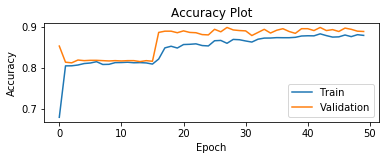

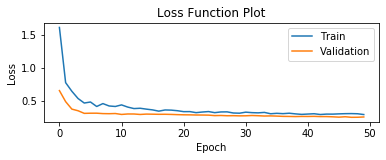

In [28]:
evaluate_model(dropout_model, dropout_model_hist)

## MLP with Batch Normalization

- 2 Batch Normalization layers

In [29]:
bn_model = Sequential()
bn_model.add(Dense(25, input_dim=21, activation='relu', kernel_initializer="glorot_normal"))
bn_model.add(BatchNormalization())
bn_model.add(Dense(15, activation='relu', kernel_initializer="glorot_normal"))
bn_model.add(BatchNormalization())
bn_model.add(Dense(1, activation='sigmoid',kernel_initializer="glorot_normal"))

In [30]:
bn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
bn_model_hist = bn_model.fit(X_train, y_train, batch_size=64, epochs=50, validation_split=0.2)


Train on 5282 samples, validate on 1321 samples
Epoch 1/50
5282/5282 [==============================] - 1s 200us/step - loss: 0.6793 - acc: 0.6583 - val_loss: 0.7204 - val_acc: 0.2854
Epoch 2/50
5282/5282 [==============================] - 0s 50us/step - loss: 0.5081 - acc: 0.8129 - val_loss: 0.6680 - val_acc: 0.7638
Epoch 3/50
5282/5282 [==============================] - 0s 48us/step - loss: 0.4290 - acc: 0.8266 - val_loss: 0.5643 - val_acc: 0.8335
Epoch 4/50
5282/5282 [==============================] - 0s 48us/step - loss: 0.3674 - acc: 0.8451 - val_loss: 0.4845 - val_acc: 0.8168
Epoch 5/50
5282/5282 [==============================] - 0s 47us/step - loss: 0.3431 - acc: 0.8525 - val_loss: 0.4405 - val_acc: 0.8183
Epoch 6/50
5282/5282 [==============================] - 0s 50us/step - loss: 0.3249 - acc: 0.8580 - val_loss: 0.4331 - val_acc: 0.8160
Epoch 7/50
5282/5282 [==============================] - 0s 52us/step - loss: 0.3181 - acc: 0.8563 - val_loss: 0.4241 - val_acc: 0.8153
Epoch 

__________ Train performance __________ 

[[5340    2]
 [1258    3]] 

Recall :  0.0023790642347343376
Precision : 0.6
Accuracy :  0.8091776465243071
__________ Test performance __________ 

[[2290    0]
 [ 540    0]] 

Recall :  0.0
Precision : 0.0
Accuracy :  0.8091872791519434

 __________ Bias variance Check __________ 



/Users/shreyasi25/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


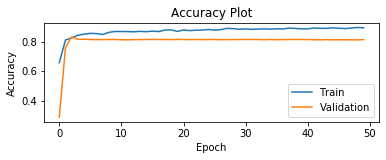

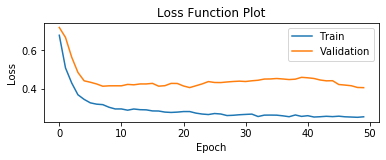

In [31]:
evaluate_model(bn_model, bn_model_hist)

### Reference Links:

https://keras.io/